In [1]:
pip install -U "autogluon>=1.0" "tensorflow>=2.14"  # ya lo tienes si seguiste la guía

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

GPUs deshabilitadas. Usando CPU únicamente.
Tamaño original Train: (40000, 2)   Test: (10000, 2)
Después de muestrear 5 % → Train: (2000, 2)   Test: (500, 2)


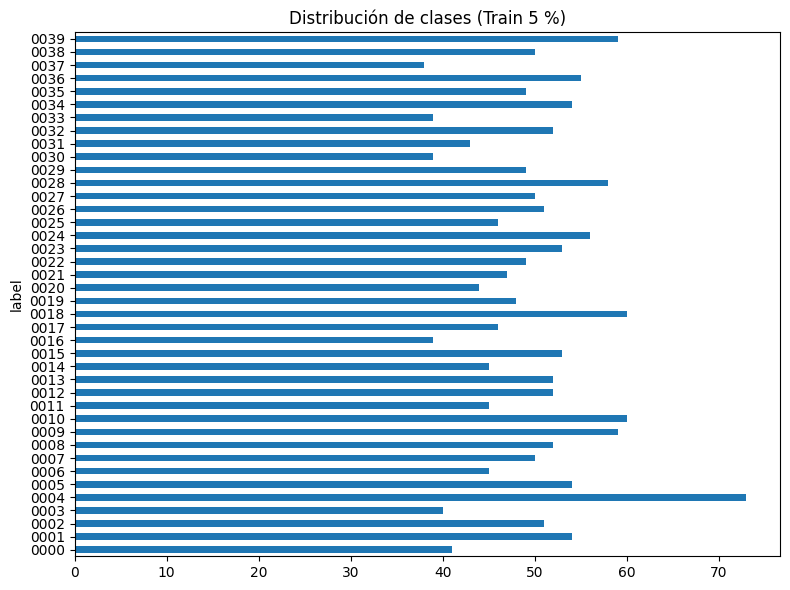

Batch imágenes shape: (32, 224, 224, 3)
Batch labels shape:   (32,)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          12
Memory Avail:       77.57 GB / 83.48 GB (92.9%)
Disk Space Avail:   190.59 GB / 235.68 GB (80.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to False. Reason: Skip dynamic_stacking when use_bag_holdout is enabled. (use_bag_holdout=True)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "/content/resnet50_feats_tabular"
Train Data Rows:    2000
Train Data Columns: 2048
Tuning Data Rows:    500
Tuning Data Columns: 2048
Label Column:       label_enc
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 40
Using Feature Generators to 

ResNet50 cargado. Output features: (None, 2048)
Features Train shape: (2000, 2048) | # etiquetas Train: 2000
Features Test  shape: (500, 2048) | # etiquetas Test: 500
DataFrame tabular Train: (2000, 2049)
DataFrame tabular Test : (500, 2049)


	Available Memory:                    79430.50 MB
	Train Data (Original)  Memory Usage: 19.53 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 45 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 112): ['f_48', 'f_49', 'f_73', 'f_92', 'f_145', 'f_181', 'f_191', 'f_196', 'f_234', 'f_246', 'f_248', 'f_288', 'f_293', 'f_299', 'f_305', 'f_319', 'f_323', 'f_328', 'f_334', 'f_352', 'f_358', 'f_388', 'f_391', 'f_403', 'f_418', 'f_430', 'f_434', 'f_471', 'f_477', 'f_492', 'f_529', 'f_538', 'f_571', 'f_589', 'f_604', 

Métricas finales (AutoGluon): {'f1_macro': 0.01653195838829106, 'accuracy': 0.05, 'balanced_accuracy': np.float64(0.7620563192014882), 'mcc': np.float64(0.014076189283091211)}

Reporte de clasificación:

              precision    recall  f1-score   support

        0000       0.17      0.02      0.04        42
        0001       0.10      0.04      0.06        50
        0002       0.14      0.04      0.06        50
        0003       0.25      0.02      0.04        45
        0004       0.13      0.14      0.14        57
        0005       0.19      0.08      0.11        50
        0006       0.25      0.02      0.03        57
        0007       0.12      0.02      0.04        47
        0008       0.13      0.04      0.07        46
        0009       0.12      0.05      0.07        56
        0010       0.00      0.00      0.00         0
        0011       0.00      0.00      0.00         0
        0012       0.00      0.00      0.00         0
        0013       0.00      0.00      

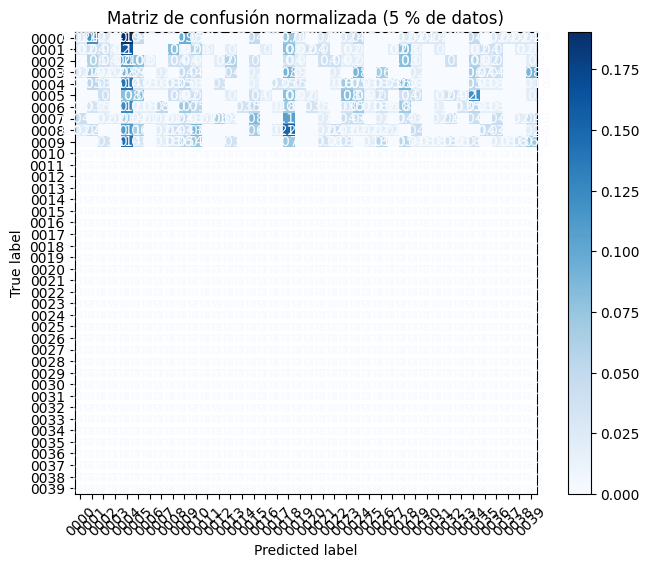

In [5]:
# -*- coding: utf-8 -*-
"""
Código mínimo para extraer features con ResNet50 en modo CPU (sin cuDNN).
Incluye muestreo del 5 % de las imágenes y entrenamiento con AutoGluon.
"""

# ───────────────────────────────────────────────────────────────────────────
# 0) BLOQUE CRUCIAL: FORZAR USO DE CPU
# ───────────────────────────────────────────────────────────────────────────
import os
# Con esta línea, TensorFlow "creerá" que no hay GPU disponible:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Ahora que ya deshabilitamos GPU, podemos importar TensorFlow con seguridad.
import tensorflow as tf

# Verificación: en CPU no debería detectar GPUs
gpus = tf.config.list_physical_devices("GPU")
if not gpus:
    print("GPUs deshabilitadas. Usando CPU únicamente.")
else:
    print("¡Atención!: aún hay GPUs detectadas:", gpus)

# ───────────────────────────────────────────────────────────────────────────
# 1) IMPORTS GENERALES
# ───────────────────────────────────────────────────────────────────────────
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from autogluon.tabular import TabularPredictor

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8, 6)

# ───────────────────────────────────────────────────────────────────────────
# 2) PARÁMETROS Y RUTAS
# ───────────────────────────────────────────────────────────────────────────
ROOT_DIR   = "/content/drive/MyDrive/Procesamiento Imagenes/Taller_2_Extraer_caracteristicas_usando_modelo_preentrenado/LabelMe-12-50k"  # <-- AJUSTA aquí
# Estructura esperada:
#   ROOT_DIR/
#       train/
#         clase_1/
#         clase_2/
#         ...
#       test/
#         clase_1/
#         clase_2/
#         ...

IMG_SIZE    = (224, 224)
BATCH_SIZE  = 32
SAMPLE_FRAC = 0.05   # Tomar sólo el 5 % de imágenes
SEED        = 42

MODEL_DIR = "resnet50_feats_tabular"
os.makedirs(MODEL_DIR, exist_ok=True)

# ───────────────────────────────────────────────────────────────────────────
# 3) CONSTRUCCIÓN DE DATAFRAMES Y MUESTREO
# ───────────────────────────────────────────────────────────────────────────
def build_dataframe(root_dir: str, split: str) -> pd.DataFrame:
    """
    Recorre root_dir/<split>/<clase>/ y arma un DataFrame con columnas:
      - image: ruta completa a la imagen
      - label: nombre de la carpeta (clase)
    """
    folder = os.path.join(root_dir, split)
    if not os.path.isdir(folder):
        raise FileNotFoundError(f"No existe la carpeta: {folder}")
    rows = []
    for cls in sorted(os.listdir(folder)):
        cls_path = os.path.join(folder, cls)
        if not os.path.isdir(cls_path):
            continue
        for filepath in glob.glob(os.path.join(cls_path, "*")):
            if filepath.lower().endswith((".jpg", ".jpeg", ".png", ".tif", ".tiff")):
                rows.append({"image": filepath, "label": cls})
    df = pd.DataFrame(rows)
    # Barajar antes de samplear
    df = df.sample(frac=1, random_state=SEED).reset_index(drop=True)
    return df

# Construir DataFrames sin filtrar
df_train = build_dataframe(ROOT_DIR, "train")
df_test  = build_dataframe(ROOT_DIR, "test")
print(f"Tamaño original Train: {df_train.shape}   Test: {df_test.shape}")

# Muestreo del 5 % en cada split
df_train = df_train.sample(frac=SAMPLE_FRAC, random_state=SEED).reset_index(drop=True)
df_test  = df_test.sample(frac=SAMPLE_FRAC, random_state=SEED).reset_index(drop=True)
print(f"Después de muestrear 5 % → Train: {df_train.shape}   Test: {df_test.shape}")

# (Opcional) Gráfico de distribución de clases en Train 5 %
(
    df_train["label"]
    .value_counts()
    .sort_index()
    .plot.barh(title="Distribución de clases (Train 5 %)")
)
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────
# 4) PIPELINE DE tf.data (resize + preprocesamiento ResNet)
# ───────────────────────────────────────────────────────────────────────────
def preprocess_image(path: tf.Tensor) -> tf.Tensor:
    """
    1) Lee el archivo de imagen desde 'path'
    2) Decodifica a tensor de 3 canales
    3) Asigna forma [None, None, 3] para que resize no falle
    4) Redimensiona a IMG_SIZE (224×224)
    5) Aplica preprocess_input de ResNet50 (rango [-1,1])
    """
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3)
    image.set_shape([None, None, 3])            # CORRECCIÓN: asignar forma de 3 canales
    image = tf.image.resize(image, IMG_SIZE)    # REDIMENSIONAR a 224×224
    image = tf.keras.applications.resnet.preprocess_input(image * 255.0)
    return image

def make_dataset(paths: list, labels: list = None, training: bool = False) -> tf.data.Dataset:
    """
    Crea tf.data.Dataset que emite:
      - Si labels=None: solo imágenes preprocesadas.
      - Si labels presente: tuplas (imagen_pre, etiqueta).
      - Si training=True: baraja los datos antes de hacer batch.
    """
    ds_paths = tf.data.Dataset.from_tensor_slices(paths)
    ds_images = ds_paths.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

    if labels is not None:
        ds_labels = tf.data.Dataset.from_tensor_slices(labels)
        ds = tf.data.Dataset.zip((ds_images, ds_labels))
    else:
        ds = ds_images

    if training:
        ds = ds.shuffle(buffer_size=len(paths), seed=SEED)

    ds = ds.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
    return ds

# Listas de rutas y etiquetas (strings)
X_train_paths  = df_train["image"].tolist()
y_train_labels = df_train["label"].tolist()
X_test_paths   = df_test["image"].tolist()
y_test_labels  = df_test["label"].tolist()

# Construir datasets
ds_train = make_dataset(X_train_paths, y_train_labels, training=False)
ds_test  = make_dataset(X_test_paths, y_test_labels, training=False)

# Verificar forma de un batch (debería ser (batch_size, 224, 224, 3))
for batch_imgs, batch_lbls in ds_train.take(1):
    print("Batch imágenes shape:", batch_imgs.shape)
    print("Batch labels shape:  ", batch_lbls.shape)
    break

# ───────────────────────────────────────────────────────────────────────────
# 5) CARGAR ResNet50 (SIN TOP) EN CPU Y EXTRAER FEATURES
# ───────────────────────────────────────────────────────────────────────────
# Como habíamos deshabilitado la GPU, esta llamada se ejecuta en CPU sin cuDNN.
base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    pooling="avg"
)
print("ResNet50 cargado. Output features:", base_model.output_shape)
# Esperamos (None, 2048)

def extract_features(model: tf.keras.Model, dataset: tf.data.Dataset) -> np.ndarray:
    """
    Dado un modelo (ResNet50 sin top) y un tf.data.Dataset (img,label) o solo img,
    retorna un array NumPy con shape (N, 2048) de features.
    """
    # Si el dataset emite (img, label), extraer solo img:
    try:
        ds_imgs = dataset.map(lambda x, y: x, num_parallel_calls=tf.data.AUTOTUNE)
    except:
        ds_imgs = dataset

    features = model.predict(ds_imgs, verbose=1)
    return features

# Extraer (o recargar) features de Train
if not os.path.exists("train_features.npy"):
    X_train_feats = extract_features(base_model, ds_train)
    np.save("train_features.npy", X_train_feats)
    np.save("train_labels.npy", np.array(y_train_labels))
else:
    X_train_feats    = np.load("train_features.npy")
    y_train_labels   = np.load("train_labels.npy").tolist()

# Extraer (o recargar) features de Test
if not os.path.exists("test_features.npy"):
    X_test_feats = extract_features(base_model, ds_test)
    np.save("test_features.npy", X_test_feats)
    np.save("test_labels.npy", np.array(y_test_labels))
else:
    X_test_feats   = np.load("test_features.npy")
    y_test_labels  = np.load("test_labels.npy").tolist()

print("Features Train shape:", X_train_feats.shape, "| # etiquetas Train:", len(y_train_labels))
print("Features Test  shape:", X_test_feats.shape,  "| # etiquetas Test:", len(y_test_labels))

# ───────────────────────────────────────────────────────────────────────────
# 6) CONSTRUIR DATAFRAMES TABULARES (features + label codificada)
# ───────────────────────────────────────────────────────────────────────────
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_labels)
y_test_enc  = le.transform(y_test_labels)

feat_cols = [f"f_{i}" for i in range(X_train_feats.shape[1])]

df_train_tab = pd.DataFrame(X_train_feats, columns=feat_cols)
df_train_tab["label_enc"] = y_train_enc

df_test_tab = pd.DataFrame(X_test_feats, columns=feat_cols)
df_test_tab["label_enc"] = y_test_enc

print("DataFrame tabular Train:", df_train_tab.shape)
print("DataFrame tabular Test :", df_test_tab.shape)

# ───────────────────────────────────────────────────────────────────────────
# 7) ENTRENAR CLASIFICADOR TABULAR CON AutoGluon
# ───────────────────────────────────────────────────────────────────────────
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(
    label="label_enc",
    problem_type="multiclass",
    eval_metric="f1_macro",
    path=MODEL_DIR,
    verbosity=2
)

predictor.fit(
    train_data=df_train_tab,
    tuning_data=df_test_tab,
    use_bag_holdout=True,
    presets="best_quality",
    hyperparameters={"GBM": {}, "RF": {}, "XGB": {}, "LR": {}},
    time_limit=1800
)

# ───────────────────────────────────────────────────────────────────────────
# 8) EVALUACIÓN FINAL Y MÉTRICAS
# ───────────────────────────────────────────────────────────────────────────
metrics = predictor.evaluate(df_test_tab, auxiliary_metrics=True)
print("Métricas finales (AutoGluon):", metrics)

y_true = df_test_tab["label_enc"]
y_pred = predictor.predict(df_test_tab)

print("\nReporte de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(cm_norm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de confusión normalizada (5 % de datos)")
plt.show()

# Guardar leaderboard para comparaciones futuras
lb = predictor.leaderboard(df_test_tab, silent=True)
lb.to_csv(os.path.join(MODEL_DIR, "leaderboard_test_5pct.csv"), index=False)


En síntesis, los resultados actuales indican que la clasificación multicategoría está funcionando casi “al azar” (por la baja exactitud y el f1_macro cercano a 0), a pesar de que el balanced_accuracy parezca alto por la forma en que excluye clases sin muestras de validació